<a href="https://colab.research.google.com/github/gbiamgaurav/ml_basics_concepts-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

heart-disease-prediction-using-logistic-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip /content/heart-disease-prediction-using-logistic-regression.zip

Archive:  /content/heart-disease-prediction-using-logistic-regression.zip
replace framingham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: framingham.csv          


In [7]:
## import libraries

import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv('/content/framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
dataset.education.value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [15]:
corr_data = pd.DataFrame(dataset.corr())

In [16]:
corr_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884


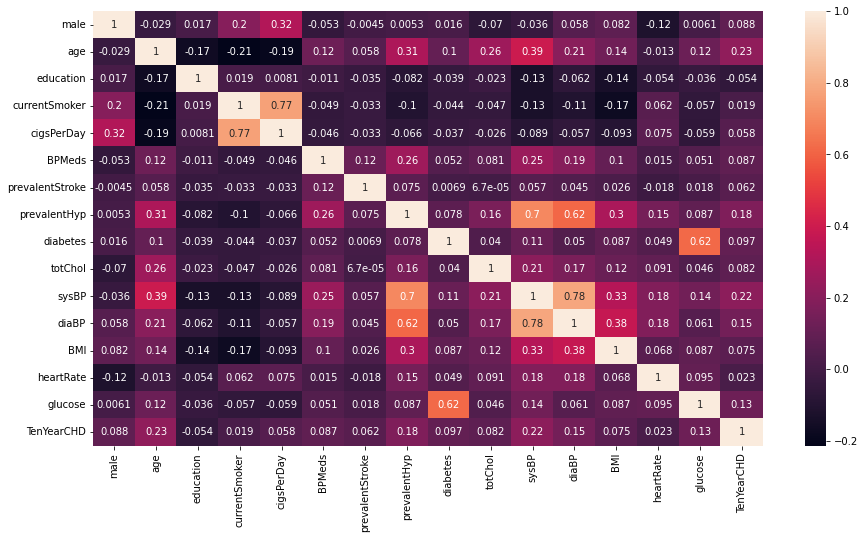

In [20]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr_data, annot=True);

### `education` columns doesnt seems like a relevant feature we can drop it. 

In [21]:
dataset.drop(['education'], axis=1, inplace=True)

In [22]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
### Make a fresh copy

df = dataset.copy()
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
### Checking for missing values

df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
count = 0

for i in df.isnull().sum():
  if i > 0:
    count = count + 1
print("Total number of rows with missing values is ", count)
print('Since it is only', round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')    

Total number of rows with missing values is  6
Since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [31]:
### Replace the missing values

df.dropna(axis=0, inplace=True)

In [32]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Exploratory Data Analysis

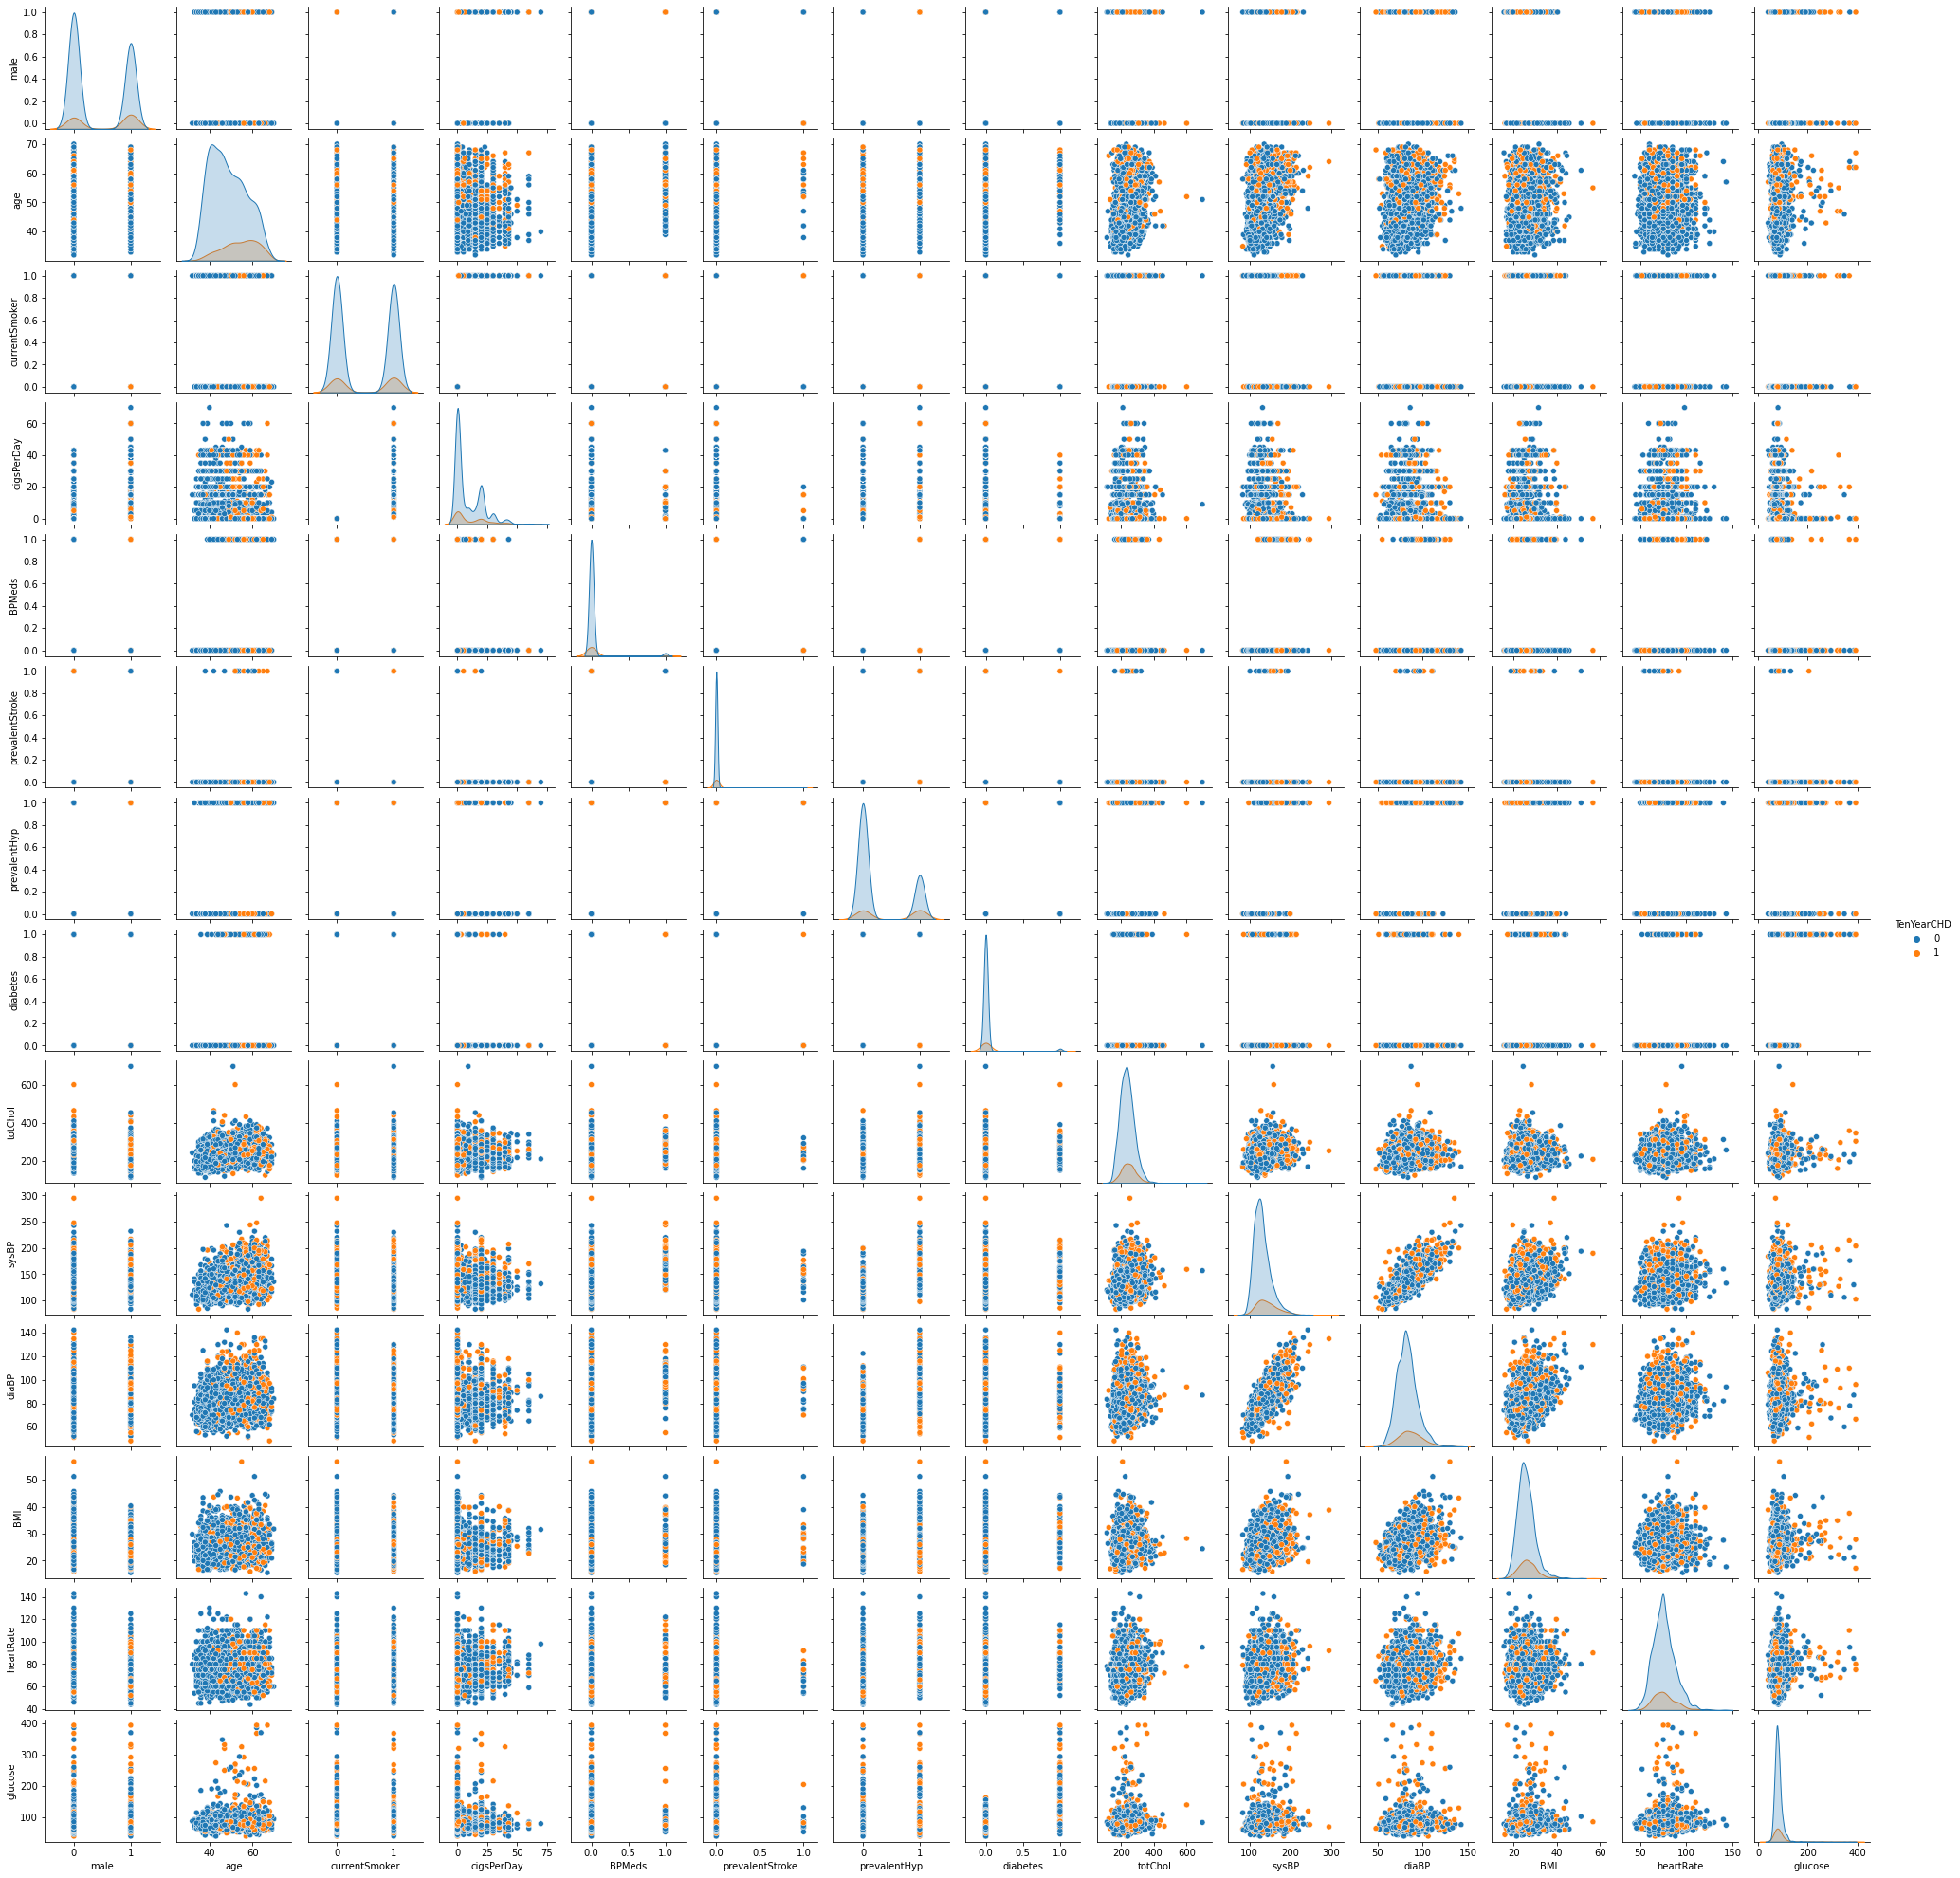

In [39]:
sns.pairplot(df, hue='TenYearCHD', size=2)

In [40]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [41]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

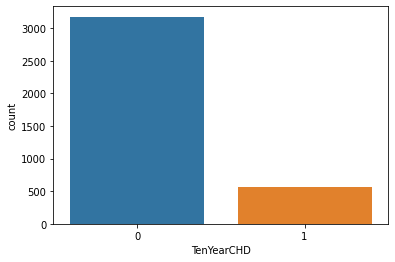

In [42]:
sns.countplot(x='TenYearCHD', data=df)

In [63]:
df.currentSmoker.value_counts()

0    1918
1    1831
Name: currentSmoker, dtype: int64

In [64]:
df.cigsPerDay.value_counts()

0.0     1918
20.0     664
30.0     195
15.0     187
10.0     125
5.0      103
9.0      103
3.0       85
40.0      71
1.0       63
43.0      49
25.0      48
35.0      19
6.0       17
2.0       16
7.0       11
60.0      10
8.0        9
4.0        9
17.0       7
18.0       7
23.0       6
11.0       5
50.0       4
13.0       3
45.0       3
12.0       3
16.0       3
19.0       2
38.0       1
29.0       1
70.0       1
14.0       1
Name: cigsPerDay, dtype: int64

In [65]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [75]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [78]:
### divide dataset into X and y 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [79]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [80]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [84]:
### Predicting on test data 

y_pred = log_reg.predict(X_test)

In [85]:
## Check the score 

from sklearn.metrics import accuracy_score, precision_score

acc_score = accuracy_score(y_test, y_pred)

In [86]:
print(acc_score)

0.8493333333333334


In [92]:
### comparing y_test and y_pred
result = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [93]:
result.head()

,predictions,actual
2544,0,0
1805,0,1
3221,0,0
3122,0,1
1739,0,0


In [94]:
from sklearn.metrics import classification_report, recall_score

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       641
           1       0.36      0.05      0.08       109

    accuracy                           0.85       750
   macro avg       0.61      0.52      0.50       750
weighted avg       0.79      0.85      0.80       750

